<a href="https://colab.research.google.com/github/PrinceChauhanhub/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Customer Churn Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using [Telco Customer Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn). We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.


Let's get started.

# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Exploratory Data Analysis
- Outliers using IQR method
- Cleaning and Transforming Data
    - One-hot Encoding
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Support Vector Classifier
- Prediction using Decision Tree Classifier
- Prediction using KNN Classifier

## Importing Libraries

First of all, we will import knwon necessary libraries.

In [2]:
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Bootcamp/Project: Customer Churn Predictions/Telco Customer Churn Data.csv')
df.shape

(7043, 21)

## Exploratory Data Analysis

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:
 - Partner: whether the customer has a partner or not (Yes, No),
 - Dependents: whether the customer has dependents or not (Yes, No),
 - OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
 - tenure: number of months the customer has stayed with the company,
 - MonthlyCharges: the amount charged to the customer monthly,
 - TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [7]:
df.size

147903

In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Totalcharges is given as object datatype but it is float datatype

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.duplicated().sum()

0

#### Basic Data Cleaning:
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [13]:
df['TotalCharges'].dtype

dtype('O')

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [15]:
df['TotalCharges'].dtype

dtype('float64')

In [16]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Total Charges contains 11 Null values

Doing Data Imputation by Median

In [17]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [18]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [19]:
df.skew(numeric_only= True)

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524
TotalCharges,0.963789


In [20]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


### Feature distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

#### Numerical features distribution

Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [21]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

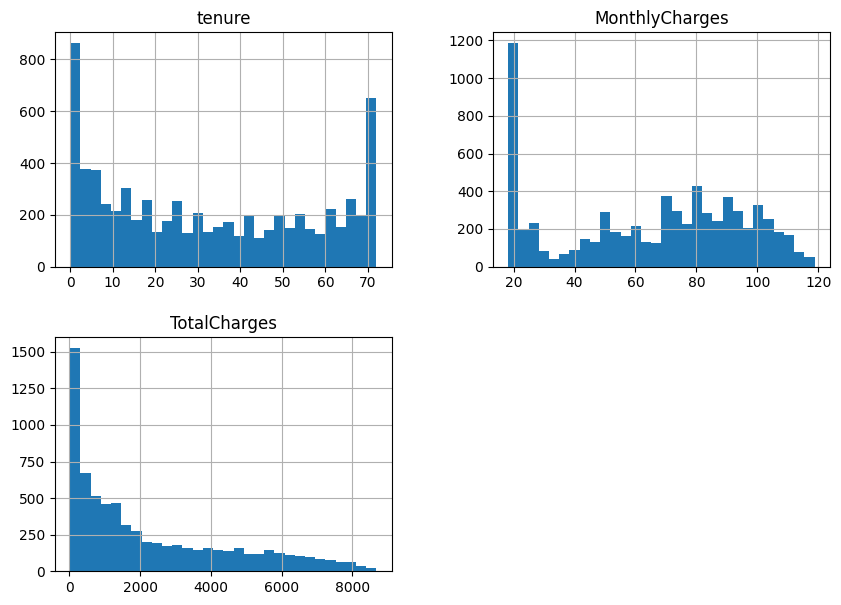

In [22]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

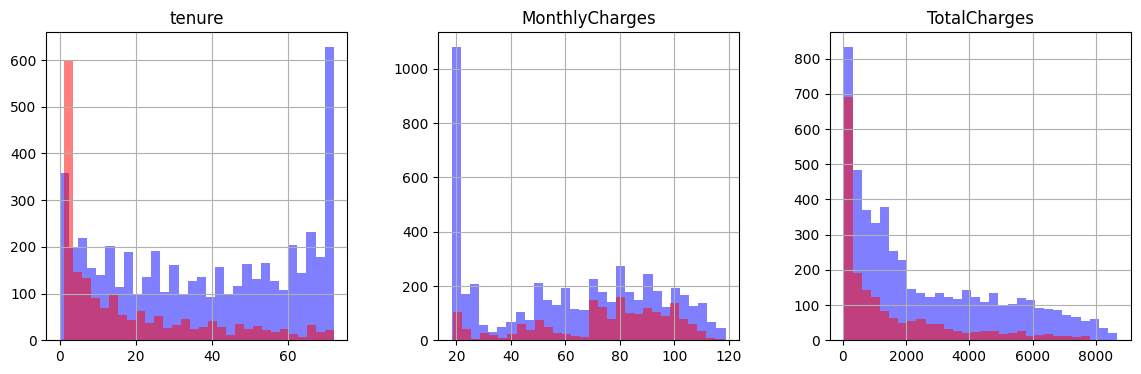

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

#### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

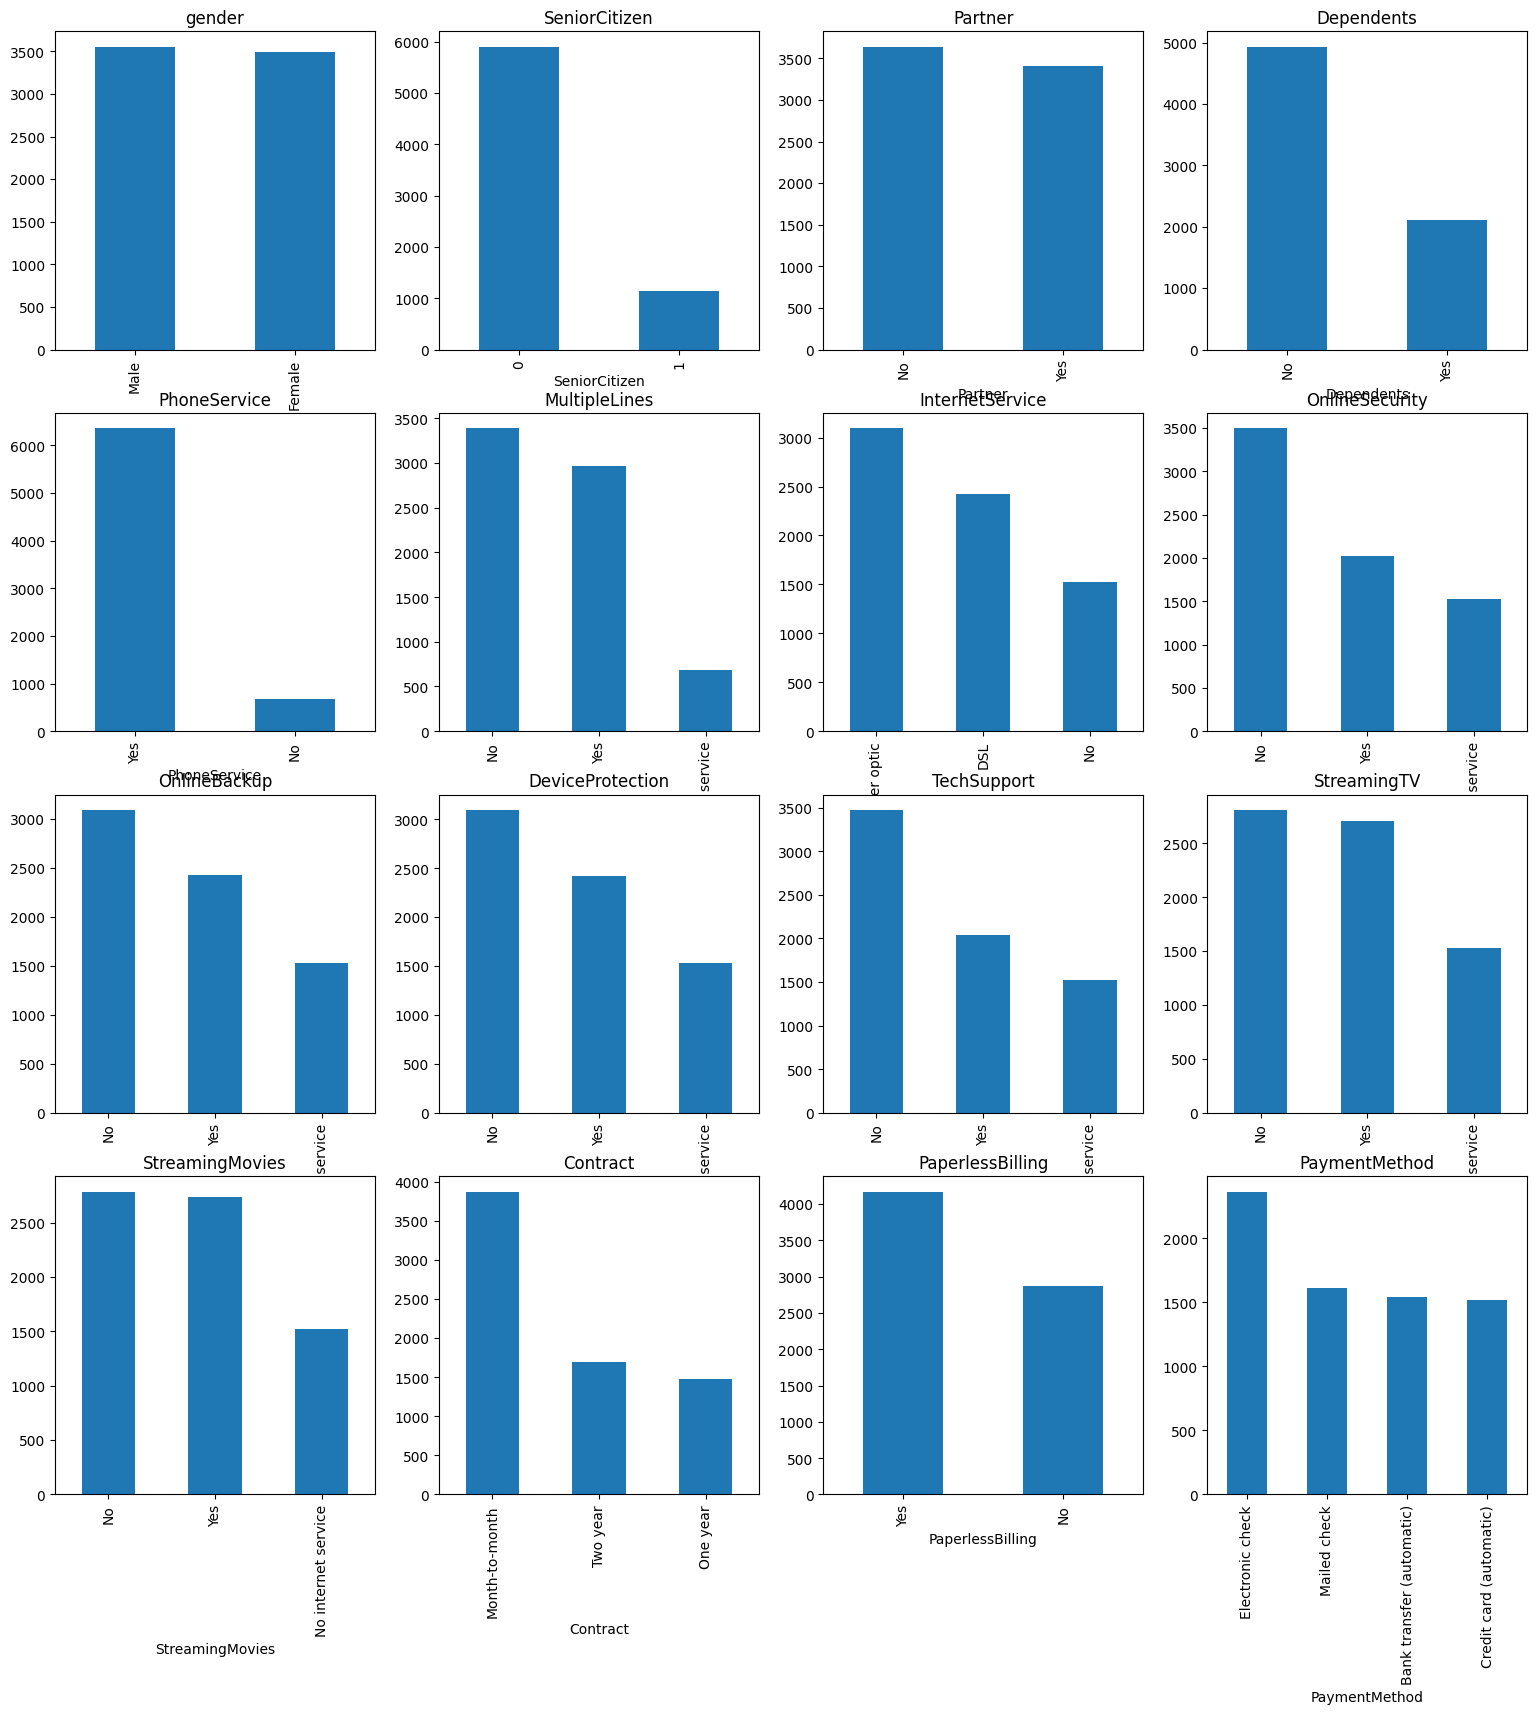

In [24]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

The next step is to look at categorical features in relation to the target variable. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

Text(0.5, 1.0, 'churned')

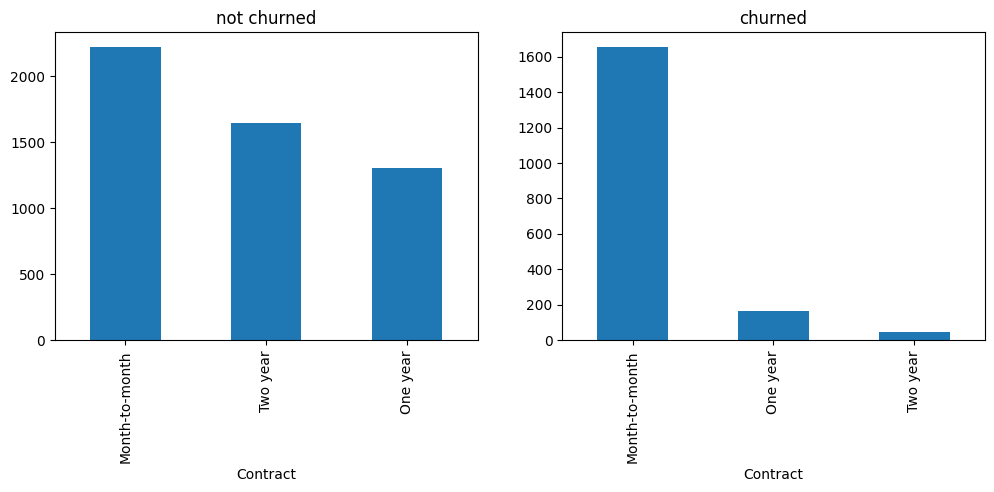

In [25]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

### Target variable distribution

Text(0.5, 1.0, 'churned')

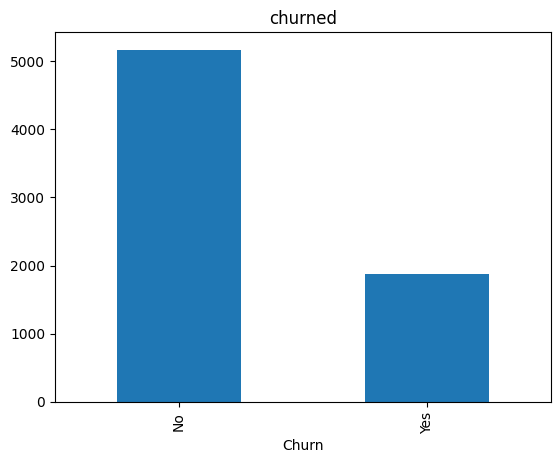

In [26]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:
- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

## Outliers Analysis with IQR Method

In [27]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


## Cleaning and Transforming Data

In [28]:
df.drop(['customerID'],axis = 1,inplace = True)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dropped customerID because it is not needed

### On Hot Encoding

In [30]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [31]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [32]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

### Rearranging Columns

In [33]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [34]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [35]:
df1.shape

(7043, 31)

In [36]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [39]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

Predicting using multiple Models

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [41]:
models = {
    'Logistic':LogisticRegression,
    'Decision Tree':DecisionTreeClassifier,
    'SVM':SVC,
    'KNN':KNeighborsClassifier,
    'Random Forest':RandomForestClassifier,
    'Gradient Boosting':GradientBoostingClassifier

}

In [42]:
results = []
for model_name, model in models.items():
    # Create an instance of the model
    model = model()

    # Fit model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

In [43]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic,0.800284,0.647577,0.528777,0.582178
1,Decision Tree,0.726455,0.480702,0.492806,0.486679
2,SVM,0.800757,0.671756,0.474820,0.556375
3,KNN,0.743966,0.514507,0.478417,0.495806
4,Random Forest,0.786086,0.621495,0.478417,0.540650
5,Gradient Boosting,0.799337,0.661765,0.485612,0.560166


Logistic Regression give best accuracy with 80% . we also did hyper parameter tuning below but the accuracy decreases so we are stick without hyperparameter tuning.

In [49]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Define models and their hyperparameter grids
# models = {
#     'Logistic Regression': (LogisticRegression(max_iter=1000), {
#         'C': [0.01, 1, 10],
#         'penalty': ['l2'],
#         'solver': ['liblinear']
#     }),
#     'Decision Tree': (DecisionTreeClassifier(), {
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5],
#         'min_samples_leaf': [1, 2, 4]
#     }),
#     'SVM': (SVC(), {
#         'C': [0.01, 0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale']
#     }),
#     'KNN': (KNeighborsClassifier(), {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']
#     }),
#     'Random Forest': (RandomForestClassifier(), {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10]
#     }),
#     'Gradient Boosting': (GradientBoostingClassifier(), {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5],
#         'min_samples_split': [2, 5]
#     })
# }



In [50]:
# # Prepare a dictionary to store the best models and their scores
# best_models = {}

# # Iterate through the models and perform hyperparameter tuning
# for model_name, (model, param_grid) in models.items():
#     print(f"Tuning hyperparameters for: {model_name}")
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                                scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

#     # Fit the grid search on the resampled training data
#     grid_search.fit(X_train_resampled, y_train_resampled)

#     # Save the best model and its score
#     best_models[model_name] = {
#         'best_estimator': grid_search.best_estimator_,
#         'best_params': grid_search.best_params_,
#         'best_score': grid_search.best_score_
#     }

#     # Print out the best parameters and score
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_:.4f}")

# # Optionally, evaluate the best model on the test set
# for model_name, model_info in best_models.items():
#     best_model = model_info['best_estimator']
#     print(f"Evaluating {model_name} on the test set:")
#     y_pred = best_model.predict(X_test)
#     print(classification_report(y_test, y_pred))

Tuning hyperparameters for: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.7774
Tuning hyperparameters for: Decision Tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy for Decision Tree: 0.7940
Tuning hyperparameters for: SVM
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy for SVM: 0.8344
Tuning hyperparameters for: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validated accuracy for KNN: 0.8406
Tuning hyperparameters for: Random Forest
F

 Random Forest appears to be the best model overall due to its highest cross-validated accuracy (0.8589) and solid test set accuracy (0.77) and performance metrics


Evaluating Logistic Regression on the test set:
Accuracy: 0.7586
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.75      0.82      1557
        True       0.53      0.79      0.63       556

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



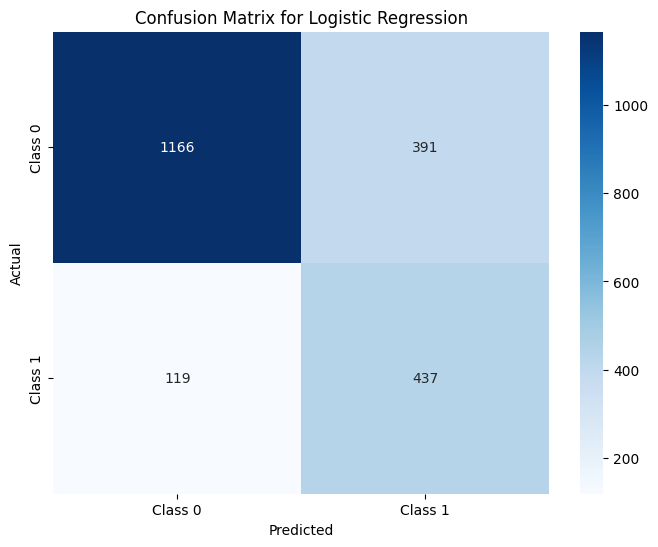

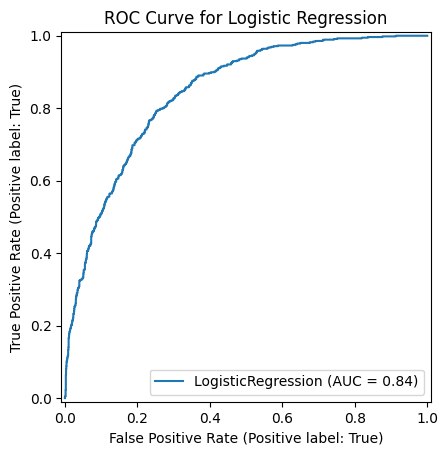


Evaluating Decision Tree on the test set:
Accuracy: 0.7430
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.77      0.82      1557
        True       0.51      0.67      0.58       556

    accuracy                           0.74      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.77      0.74      0.75      2113



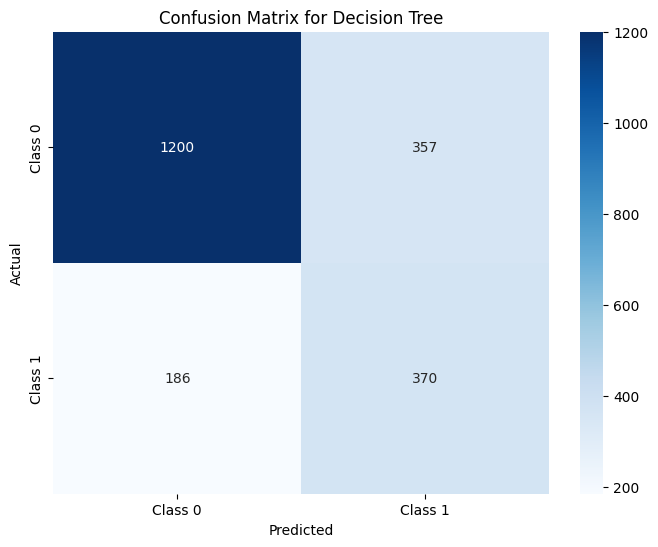

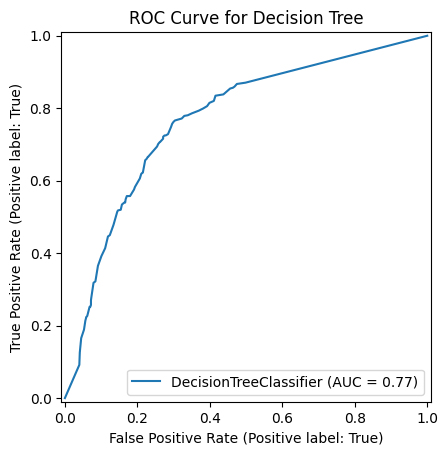


Evaluating SVM on the test set:
Accuracy: 0.7492
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.80      0.82      1557
        True       0.52      0.62      0.56       556

    accuracy                           0.75      2113
   macro avg       0.69      0.71      0.69      2113
weighted avg       0.77      0.75      0.76      2113



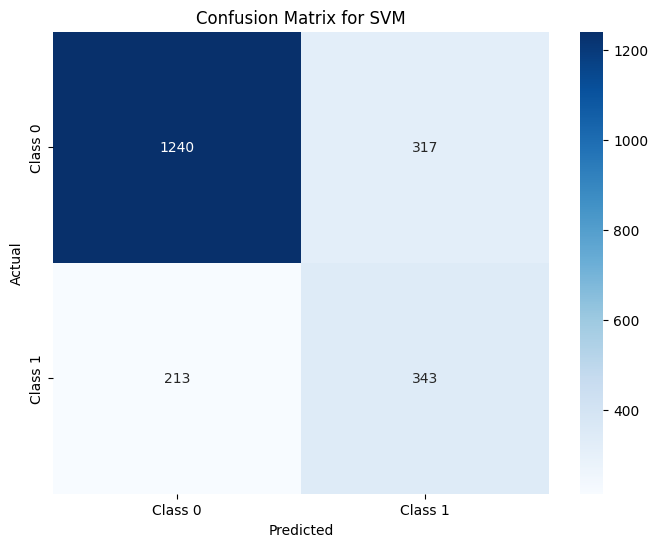

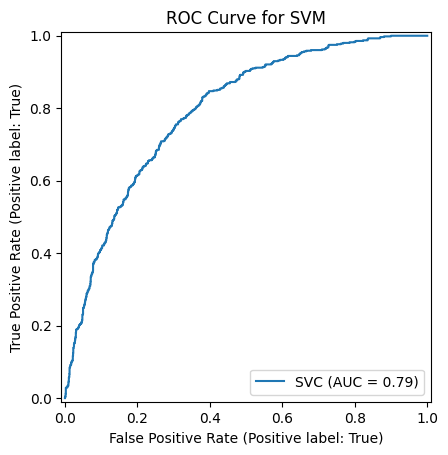


Evaluating KNN on the test set:
Accuracy: 0.7028
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.76      0.79      1557
        True       0.45      0.54      0.49       556

    accuracy                           0.70      2113
   macro avg       0.63      0.65      0.64      2113
weighted avg       0.72      0.70      0.71      2113



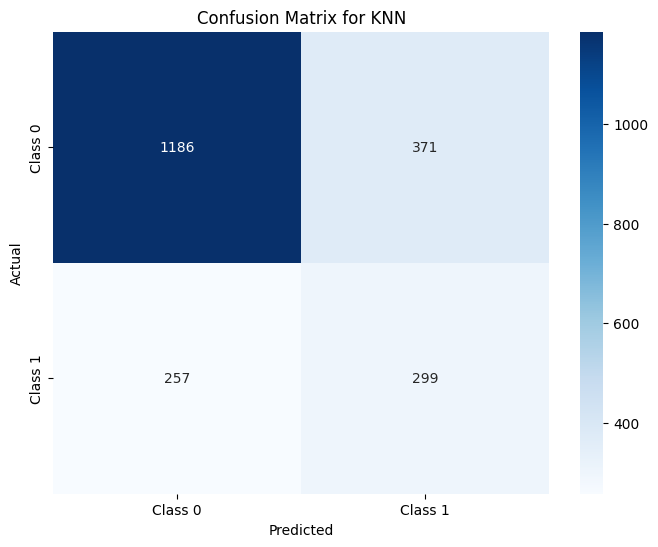

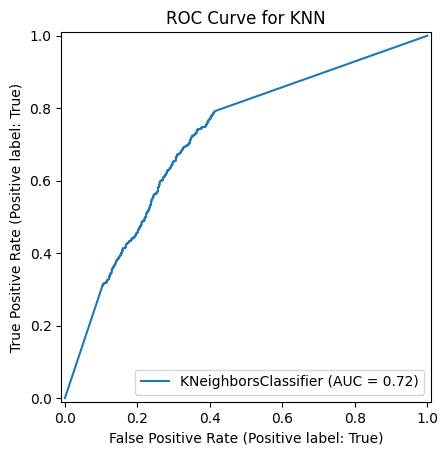


Evaluating Random Forest on the test set:
Accuracy: 0.7728
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1557
        True       0.57      0.57      0.57       556

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113



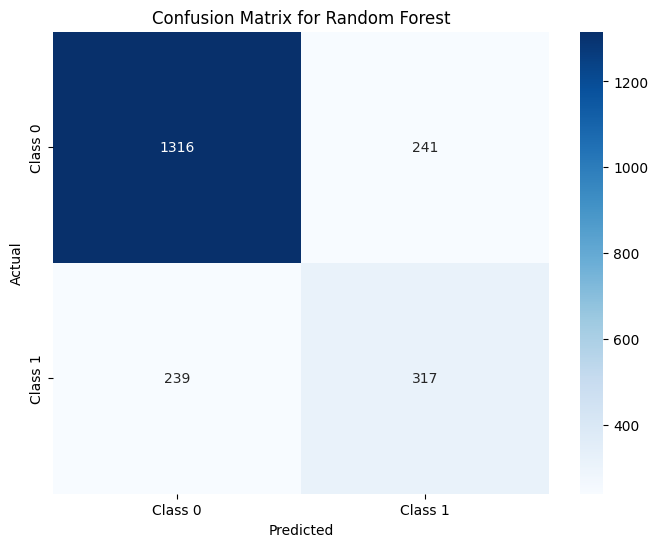

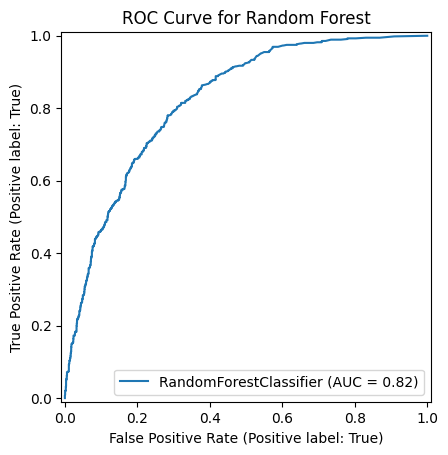


Evaluating Gradient Boosting on the test set:
Accuracy: 0.7809
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1557
        True       0.58      0.58      0.58       556

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



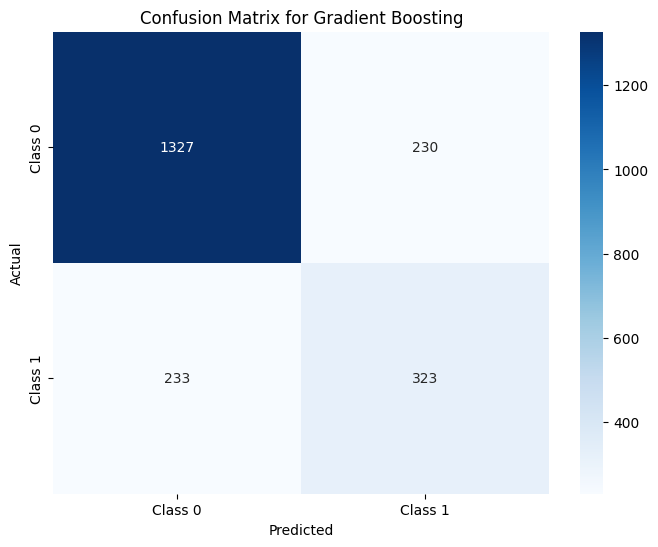

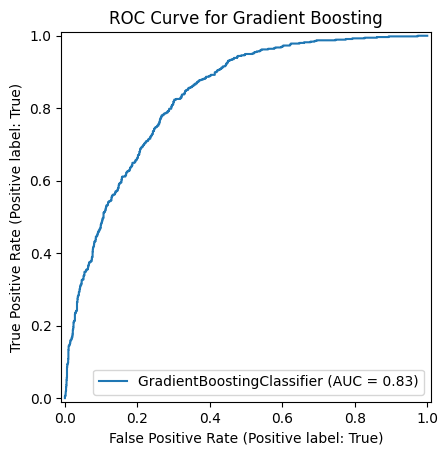


Logistic Regression Evaluation Results:
Accuracy: 0.7586
Confusion Matrix:
 [[1166  391]
 [ 119  437]]

Decision Tree Evaluation Results:
Accuracy: 0.7430
Confusion Matrix:
 [[1200  357]
 [ 186  370]]

SVM Evaluation Results:
Accuracy: 0.7492
Confusion Matrix:
 [[1240  317]
 [ 213  343]]

KNN Evaluation Results:
Accuracy: 0.7028
Confusion Matrix:
 [[1186  371]
 [ 257  299]]

Random Forest Evaluation Results:
Accuracy: 0.7728
Confusion Matrix:
 [[1316  241]
 [ 239  317]]

Gradient Boosting Evaluation Results:
Accuracy: 0.7809
Confusion Matrix:
 [[1327  230]
 [ 233  323]]


In [51]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay

# # Assume you have the following variables from previous steps
# # y_test: true labels for the test set
# # X_test: feature set for the test set

# # Prepare to store evaluation results
# evaluation_results = {}

# # Iterate through the best models and evaluate each on the test set
# for model_name, model_info in best_models.items():
#     best_model = model_info['best_estimator']
#     print(f"\nEvaluating {model_name} on the test set:")

#     # Make predictions
#     y_pred = best_model.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy: {accuracy:.4f}")

#     # Generate and print classification report
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))

#     # Generate and plot confusion matrix
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
#     plt.title(f"Confusion Matrix for {model_name}")
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

#     # Plot ROC Curve if it's a binary classification problem
#     RocCurveDisplay.from_estimator(best_model, X_test, y_test)
#     plt.title(f"ROC Curve for {model_name}")
#     plt.show()

#     # Save evaluation results
#     evaluation_results[model_name] = {
#         'accuracy': accuracy,
#         'classification_report': classification_report(y_test, y_pred, output_dict=True),
#         'confusion_matrix': conf_matrix
#     }

# # Optionally, print out the evaluation results summary
# for model_name, results in evaluation_results.items():
#     print(f"\n{model_name} Evaluation Results:")
#     print(f"Accuracy: {results['accuracy']:.4f}")
#     print("Confusion Matrix:\n", results['confusion_matrix'])